In [1]:
#install the modules
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 641.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [5]:
data=pd.read_csv("/content/Heart_Disease_Dataset.csv")

In [6]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [7]:
#bottom rows
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
100196,No,48.02,No,No,Yes,13,17,No,Female,45-49,White,"No, borderline diabetes",No,Fair,6.4,Yes,No,No
100197,Yes,82.88,No,No,No,29,23,No,Male,75-79,Other,"No, borderline diabetes",Yes,Very good,18.9,Yes,Yes,No
100198,No,39.46,No,Yes,Yes,23,6,Yes,Male,80 or older,Hispanic,Yes,No,Excellent,18.5,Yes,No,Yes
100199,No,46.25,Yes,Yes,Yes,9,14,No,Male,25-29,American Indian/Alaskan Native,No,No,Very good,22.7,Yes,Yes,No
100200,No,39.26,Yes,No,No,10,5,Yes,Female,25-29,Other,"No, borderline diabetes",Yes,Fair,4.1,No,No,Yes


In [8]:
data.shape

(100201, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100201 entries, 0 to 100200
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      100201 non-null  object 
 1   BMI               100201 non-null  float64
 2   Smoking           100201 non-null  object 
 3   AlcoholDrinking   100201 non-null  object 
 4   Stroke            100201 non-null  object 
 5   PhysicalHealth    100201 non-null  int64  
 6   MentalHealth      100201 non-null  int64  
 7   DiffWalking       100201 non-null  object 
 8   Sex               100201 non-null  object 
 9   AgeCategory       100201 non-null  object 
 10  Race              100201 non-null  object 
 11  Diabetic          100201 non-null  object 
 12  PhysicalActivity  100201 non-null  object 
 13  GenHealth         100201 non-null  object 
 14  SleepTime         100201 non-null  float64
 15  Asthma            100201 non-null  object 
 16  KidneyDisease     10

In [10]:
#statistical analysis
data.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,100201.000000,100201.000000,100201.000000,100201.000000
mean,53.373302,14.503937,14.498239,12.490389
std,23.878712,8.640423,8.658639,6.632122
min,12.020000,0.000000,0.000000,1.000000
25%,32.760000,7.000000,7.000000,6.700000
50%,53.380000,14.000000,15.000000,12.500000
75%,73.950000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [11]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [12]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
100196,False
100197,False
100198,False
100199,False


In [13]:
len(data[data.duplicated()])

0

In [14]:
for column in data.columns:
  print(data[column].value_counts())

HeartDisease
Yes    50134
No     50067
Name: count, dtype: int64
BMI
56.38    26
91.47    26
27.95    26
88.49    26
66.39    25
         ..
23.75     3
29.15     3
65.14     3
34.33     2
91.36     2
Name: count, Length: 8284, dtype: int64
Smoking
Yes    50445
No     49756
Name: count, dtype: int64
AlcoholDrinking
Yes    50435
No     49766
Name: count, dtype: int64
Stroke
Yes    50265
No     49936
Name: count, dtype: int64
PhysicalHealth
8     3430
20    3401
9     3395
16    3392
19    3386
13    3385
12    3377
26    3369
29    3363
15    3355
23    3354
22    3347
28    3345
14    3343
2     3341
1     3337
10    3334
11    3332
6     3329
0     3328
17    3327
7     3323
24    3316
5     3305
18    3301
3     3287
21    3285
27    3277
25    3270
4     3267
Name: count, dtype: int64
MentalHealth
27    3442
16    3442
13    3419
5     3403
26    3397
21    3394
22    3390
7     3382
2     3377
8     3376
1     3374
18    3367
14    3362
28    3361
6     3360
3     3357
20    3342
9

In [15]:
lis=[2,34,4,5,6]
for i in lis:
  print(i)

2
34
4
5
6


In [16]:
data['Diabetic'].value_counts()

,count
Diabetic,
Yes (during pregnancy),25171
"No, borderline diabetes",25077
Yes,25001
No,24952


In [17]:
data=pd.get_dummies(data,columns=['Diabetic'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [18]:
##convert binary categorical variables into numerical columns
binary_columns=["Smoking","AlcoholDrinking","Stroke","DiffWalking",'PhysicalActivity',"Asthma",'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col]=data[col].map({'Yes':1,"No":0})

In [19]:
data=pd.get_dummies(data,columns=['Sex','AgeCategory','Race','GenHealth'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,1,1,0,7,6,1,1,17.1,...,False,False,False,False,False,True,True,False,False,False
1,Yes,36.93,1,1,0,3,10,0,1,2.7,...,False,False,False,True,False,False,False,False,True,False
2,No,18.70,1,0,1,26,15,0,0,15.6,...,False,False,False,True,False,False,False,False,True,False
3,Yes,31.43,1,1,1,24,20,0,0,1.4,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,0,0,1,2,29,0,1,8.8,...,False,False,False,False,False,True,False,False,False,False


In [20]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
PhysicalActivity,0
SleepTime,0


In [23]:
#X,target
X=data.drop(columns=['HeartDisease'],axis=1)
y=data['HeartDisease'].map({'Yes':1,'No':0})

In [24]:
#train-test-splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
#initialize the model
clf=DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:
#make the prediction
y_pred=clf.predict(X_test)

In [29]:
#evalute the model
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_score=roc_auc_score(y_test,y_pred)

Accuracy: 0.49623272291801807
Precision: 0.4955588091752074
Recall: 0.5074462768615692
F1 Score: 0.501432098765432
ROC AUC Score: 0.4962500415794494


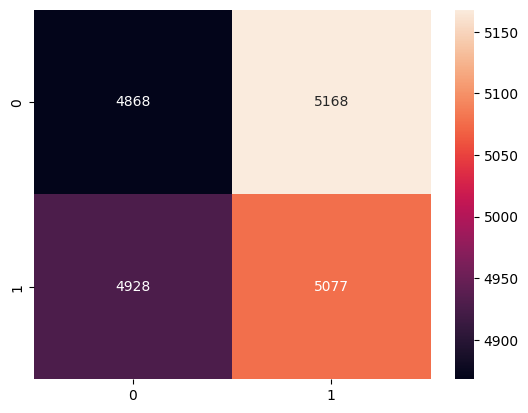

In [30]:
#print metrics
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
print("ROC AUC Score:",roc_score)
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()